# Imports e cofigurações iniciais

In [36]:
# Importando pacotes
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from unidecode import unidecode

## Carregando dados e visualizando

In [37]:
# Fazendo a leitura e vizualização do dataset
imoveis_df = pd.read_csv("../Dados/imoveis.csv")
imoveis_df.head()

,url,tipo,bairro,cidade,objetivo,preco,area_util,quartos,suites,vagas
0,https://www.novasaopaulo.com.br/imovel/casa-te...,Casa Térrea,Centro,Diadema,Locação,700.0,30.0,1.0,NaN,NaN
1,https://www.novasaopaulo.com.br/imovel/conj-co...,Conjunto Comercial,Jardim Oriental,São Paulo,Locação,700.0,37.0,NaN,NaN,NaN
2,https://www.novasaopaulo.com.br/imovel/conj-co...,Conjunto Comercial,Mirandópolis,São Paulo,Locação,700.0,12.0,NaN,NaN,NaN
3,https://www.novasaopaulo.com.br/imovel/casa-te...,Casa Térrea,Americanópolis,São Paulo,Locação,800.0,40.0,1.0,NaN,NaN
4,https://www.novasaopaulo.com.br/imovel/sobrado...,Sobrado,Centro,Diadema,Locação,800.0,30.0,1.0,NaN,NaN


In [38]:
imoveis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   url        10127 non-null  object 
 1   tipo       10127 non-null  object 
 2   bairro     10127 non-null  object 
 3   cidade     10127 non-null  object 
 4   objetivo   10127 non-null  object 
 5   preco      10127 non-null  float64
 6   area_util  10126 non-null  float64
 7   quartos    8389 non-null   float64
 8   suites     5091 non-null   float64
 9   vagas      8440 non-null   float64
dtypes: float64(5), object(5)
memory usage: 791.3+ KB


## Visualizando tipos de imoveis e quantidade total de cada tipo

In [39]:
# Contagem de cada tipo de imóvel
imoveis_df['tipo'].value_counts()

tipo
Apartamento           4644
Sobrado               1714
Conjunto Comercial     721
Comercial              525
Casa Térrea            443
Studio                 311
Casa Assobradada       296
Cobertura              198
Prédio                 187
Terreno                174
APARTAMENTO            160
Condomínio             157
Loja                   135
Galpão                 122
Casa de Vila            94
Duplex                  86
Garden                  30
Kitnet                  30
CASA                    27
Flat                    22
COBERTURA               14
Ponto Comercial         13
Triplex                  5
Sítio                    5
CONJ. COMERCIAL          4
CONDOMÍNIO               4
Penthouse                3
GARDEM                   1
COMERCIAL                1
CASA DE VILA             1
Name: count, dtype: int64

## Padronizando os textos

In [40]:
# Normalizar para minusculas
imoveis_df['tipo'] = imoveis_df['tipo'].str.strip().str.lower()
imoveis_df['bairro'] = imoveis_df['bairro'].str.strip().str.lower()
imoveis_df['cidade'] = imoveis_df['cidade'].str.strip().str.lower()

In [41]:
# cria um dicionário de substituições
map_tipos = {
    'sobrado': 'casa',
    'conjunto comercial': 'comercial',
    'casa térrea': 'casa',
    'studio': 'kitnet',
    'casa assobradada': 'casa',
    'casa de vila': 'casa',
    'flat': 'kitnet',
    'ponto comercial': 'comercial',
    'conj. comercial': 'comercial',
}

# aplica substituições
imoveis_df['tipo'] = imoveis_df['tipo'].replace(map_tipos)


In [42]:
imoveis_df['tipo'].value_counts()

tipo
apartamento    4804
casa           2575
comercial      1264
kitnet          363
cobertura       212
prédio          187
terreno         174
condomínio      161
loja            135
galpão          122
duplex           86
garden           30
triplex           5
sítio             5
penthouse         3
gardem            1
Name: count, dtype: int64

## Removendo tipos de imoveis irrelevantes

In [43]:
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'comercial'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'kitnet'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'cobertura'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'prédio'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'terreno'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'condomínio'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'loja'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'galpão'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'duplex'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'garden'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'triplex'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'sítio'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'penthouse'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['tipo'] == 'gardem'].index)

imoveis_df['tipo'].value_counts()

tipo
apartamento    4804
casa           2575
Name: count, dtype: int64

<h2>Visualizando e padronizando cidades</h2>

In [44]:
imoveis_df['cidade'].value_counts()

cidade
são paulo                7322
são bernardo do campo      17
diadema                    16
santo andré                 8
guarujá                     4
são caetano do sul          3
ilha comprida               1
praia grande                1
taboão da serra             1
mairinque                   1
osasco                      1
indaiatuba                  1
santos                      1
são roque                   1
santana de parnaíba         1
Name: count, dtype: int64

In [45]:
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'são bernardo do campo'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'diadema'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'santo andré'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'guarujá'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'são caetano do sul'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'ilha comprida'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'praia grande'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'taboão da serra'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'mairinque'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'osasco'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'indaiatuba'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'santos'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'são roque'].index)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['cidade'] == 'santana de parnaíba'].index)

imoveis_df['cidade'].value_counts()

cidade
são paulo    7322
Name: count, dtype: int64

<h2>Visualizando e padronizando bairros</h2>

In [46]:
imoveis_df['bairro'].value_counts()

bairro
saúde                663
vila mariana         431
planalto paulista    339
moema                327
ipiranga             306
                    ... 
jardim franca          1
chácara meyer          1
recanto paraíso        1
chácara flora          1
jardim ernestina       1
Name: count, Length: 261, dtype: int64

In [47]:
def padronizar_bairro(texto):
    if not isinstance(texto, str):
        return texto
    texto = texto.strip().lower()
    texto = unidecode(texto)
    texto = texto.replace(" ", "_")
    return texto

imoveis_df['bairro'] = imoveis_df['bairro'].apply(padronizar_bairro)

imoveis_df['bairro'].value_counts()

bairro
saude                663
vila_mariana         431
planalto_paulista    339
moema                327
ipiranga             306
                    ... 
jardim_franca          1
chacara_meyer          1
recanto_paraiso        1
chacara_flora          1
jardim_ernestina       1
Name: count, Length: 260, dtype: int64

## Vizualizando objetivo dos imoveis

In [48]:
print(imoveis_df['objetivo'].value_counts())

objetivo
Venda      6465
Locação     857
Name: count, dtype: int64


## Localizando registros com valores nulos

In [49]:
# Localizando registros com valores nulos
imoveis_df.isnull().sum()

url             0
tipo            0
bairro          0
cidade          0
objetivo        0
preco           0
area_util       0
quartos        16
suites       2839
vagas         772
dtype: int64

## Preenchendo valores nulos

In [50]:
# Substituindo valores nulos de quartos pela mediana
imoveis_df['quartos'] = imoveis_df['quartos'].fillna(imoveis_df['quartos'].median())

# Substituindo valores nulos em vagas e suites por 0
imoveis_df[['vagas', 'suites']] = imoveis_df[['vagas', 'suites']].fillna(0)
imoveis_df.isnull().sum()

url          0
tipo         0
bairro       0
cidade       0
objetivo     0
preco        0
area_util    0
quartos      0
suites       0
vagas        0
dtype: int64

## Garantir consistência de tipos

In [51]:
# Verifica os tipos de dados de cada coluna
print(imoveis_df.dtypes)

url           object
tipo          object
bairro        object
cidade        object
objetivo      object
preco        float64
area_util    float64
quartos      float64
suites       float64
vagas        float64
dtype: object


In [52]:
# Converter inteiros
for col in ['quartos', 'suites', 'vagas']:
    imoveis_df[col] = pd.to_numeric(imoveis_df[col], errors='coerce').fillna(0).astype(int)

In [53]:
# Verifica os tipos de dados de cada coluna
print(imoveis_df.dtypes)

url           object
tipo          object
bairro        object
cidade        object
objetivo      object
preco        float64
area_util    float64
quartos        int64
suites         int64
vagas          int64
dtype: object


## Detectar e analisar outliers (imoveis para VENDA)

In [54]:
# Filtra os imóveis com objetivo "venda"
imoveis_venda = imoveis_df[imoveis_df['objetivo'] == 'Venda'].copy()

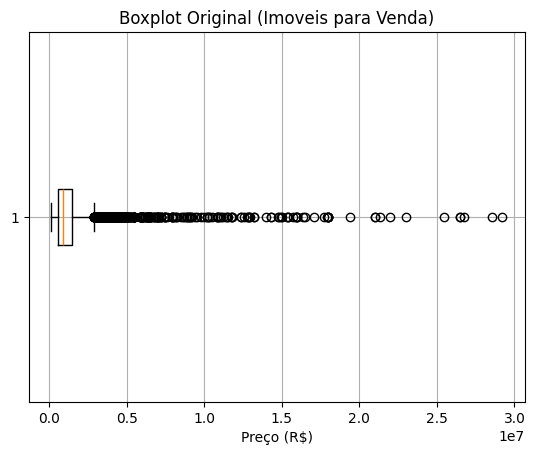

In [55]:
# Gera o boxplot do preço
plt.boxplot(imoveis_venda['preco'], vert=False)
plt.title("Boxplot Original (Imoveis para Venda)")
plt.xlabel("Preço (R$)")
plt.grid(True)
plt.show()

In [56]:
media = imoveis_venda['preco'].mean()
desvio_padrao = imoveis_venda['preco'].std()

print(f"Média: {media:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")

# Mantém apenas valores dentro de ± 2 desvios padrão
imoveis_venda_filtrado = imoveis_venda[
    (imoveis_venda['preco'] >= media - 2*desvio_padrao) &
    (imoveis_venda['preco'] <= media + 2*desvio_padrao)
].copy()

print(f"Quantidade original: {len(imoveis_venda)}")
print(f"Quantidade após filtro: {len(imoveis_venda_filtrado)}")

Média: 1390172.47
Desvio padrão: 1870883.00
Quantidade original: 6465
Quantidade após filtro: 6303


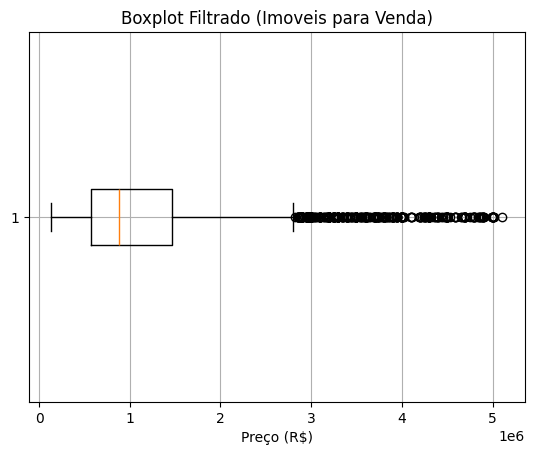

In [57]:
# Gera o boxplot do preço
plt.boxplot(imoveis_venda_filtrado['preco'], vert=False)
plt.title("Boxplot Filtrado (Imoveis para Venda)")
plt.xlabel("Preço (R$)")
plt.grid(True)
plt.show()

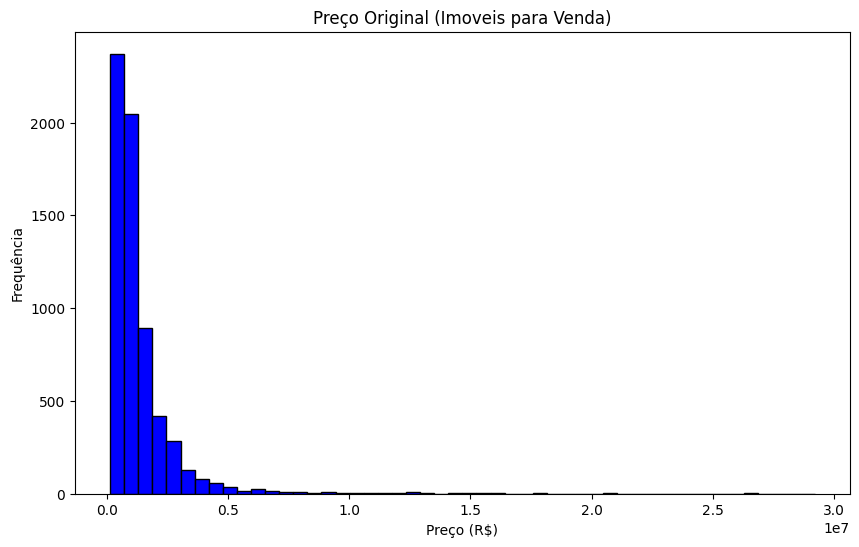

In [60]:
plt.figure(figsize=(10, 6))

# Plota o histograma
plt.hist(imoveis_venda['preco'], bins=50, color='blue', edgecolor='black')

# Configurações
plt.title("Preço Original (Imoveis para Venda)")
plt.xlabel("Preço (R$)")
plt.ylabel("Frequência")

# Exibe o gráfico
plt.show()

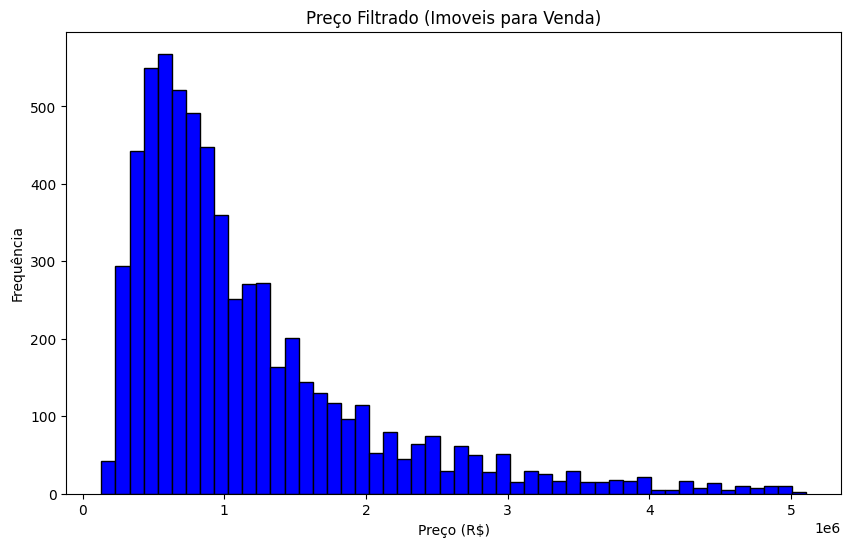

In [61]:
plt.figure(figsize=(10, 6))

# Plota o histograma
plt.hist(imoveis_venda_filtrado['preco'], bins=50, color='blue', edgecolor='black')

# Configurações
plt.title("Preço Filtrado (Imoveis para Venda)")
plt.xlabel("Preço (R$)")
plt.ylabel("Frequência")

# Exibe o gráfico
plt.show()

## Detectar e analisar outliers (imoveis para LOCAÇÃO)

In [62]:
# Filtra os imóveis com objetivo "Locação"
imoveis_locacao = imoveis_df[imoveis_df['objetivo'] == 'Locação'].copy()

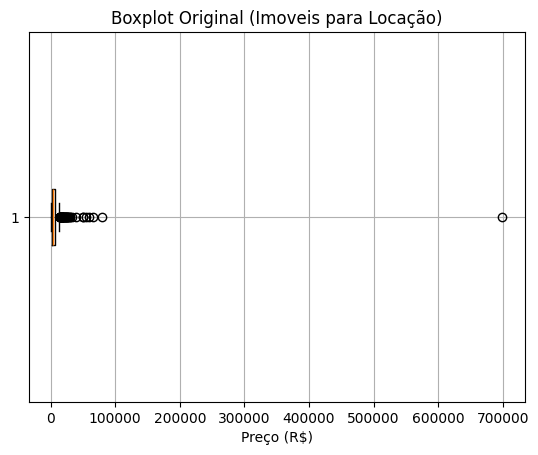

In [63]:
# Gera o boxplot do preço
plt.boxplot(imoveis_locacao['preco'], vert=False)
plt.title("Boxplot Original (Imoveis para Locação)")
plt.xlabel("Preço (R$)")
plt.grid(True)
plt.show()

In [65]:
media = imoveis_locacao['preco'].mean()
desvio_padrao = imoveis_locacao['preco'].std()

print(f"Média: {media:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")

# Mantém apenas valores dentro de ± 2 desvios padrão
imoveis_locacao_filtrado = imoveis_locacao[
    (imoveis_locacao['preco'] >= media - 2*desvio_padrao) &
    (imoveis_locacao['preco'] <= media + 2*desvio_padrao)
].copy()

print(f"Quantidade original: {len(imoveis_locacao)}")
print(f"Quantidade após filtro: {len(imoveis_locacao_filtrado)}")

Média: 6701.52
Desvio padrão: 24606.15
Quantidade original: 857
Quantidade após filtro: 853


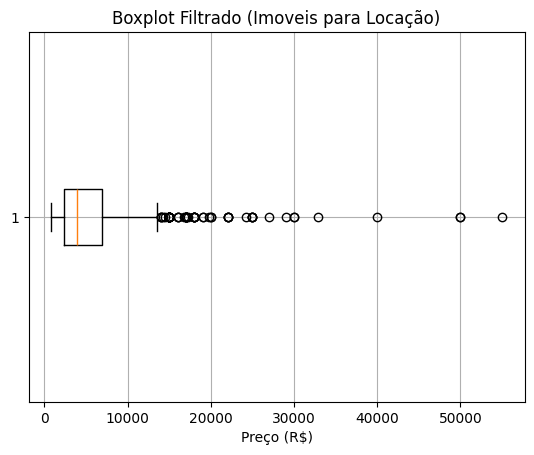

In [66]:
# Gera o boxplot do preço
plt.boxplot(imoveis_locacao_filtrado['preco'], vert=False)
plt.title("Boxplot Filtrado (Imoveis para Locação)")
plt.xlabel("Preço (R$)")
plt.grid(True)
plt.show()

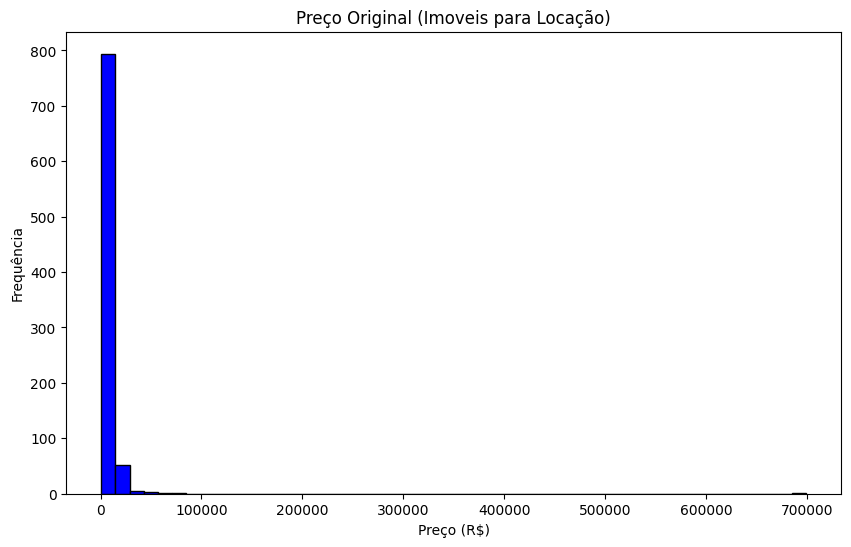

In [67]:
# Cria a área do primeiro gráfico
plt.figure(figsize=(10, 6))

# Plota o histograma
plt.hist(imoveis_locacao['preco'], bins=50, color='blue', edgecolor='black')

# Configurações
plt.title("Preço Original (Imoveis para Locação)")
plt.xlabel("Preço (R$)")
plt.ylabel("Frequência")

# Exibe
plt.show()

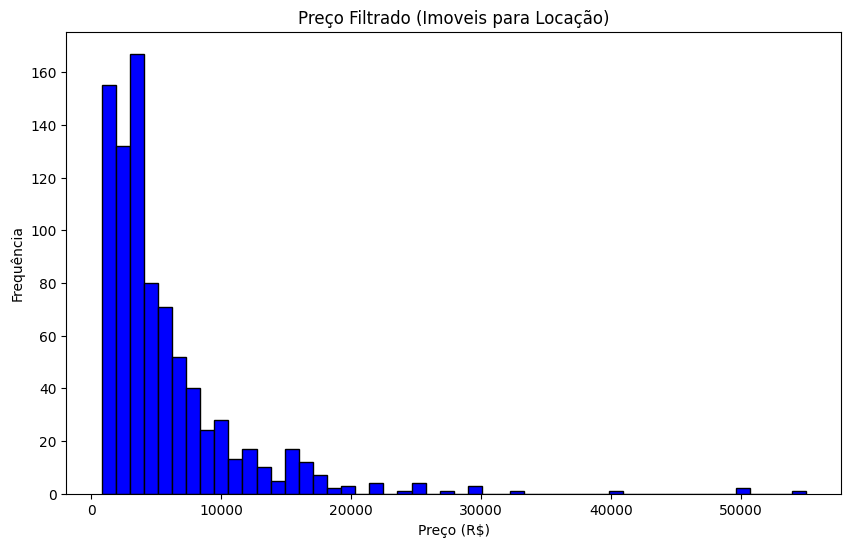

In [68]:
# Cria a área do segundo gráfico
plt.figure(figsize=(10, 6))

# Plota o histograma
plt.hist(imoveis_locacao_filtrado['preco'], bins=50, color='blue', edgecolor='black')

# Configurações
plt.title("Preço Filtrado (Imoveis para Locação)")
plt.xlabel("Preço (R$)")
plt.ylabel("Frequência")

# Exibe
plt.show()

<h2>Preparando dataframes e realizando download</h2>

In [30]:
# Removendo coluna com URL
imoveis_venda_filtrado = imoveis_venda_filtrado.drop(columns=['url'])
imoveis_locacao_filtrado = imoveis_locacao_filtrado.drop(columns=['url'])

# Define a nova ordem das colunas
nova_ordem = [
    'tipo', 'bairro', 'cidade', 'objetivo',
    'area_util', 'quartos', 'suites', 'vagas',
    'preco'
]

# Reorganiza o DataFrame
imoveis_venda_filtrado = imoveis_venda_filtrado[nova_ordem]
imoveis_locacao_filtrado = imoveis_locacao_filtrado[nova_ordem]

In [91]:
# Salva os imóveis de venda filtrados
imoveis_venda_filtrado.to_csv('../Dados/imoveis_venda_filtrado.csv', index=False)

# Salva os imóveis de locação filtrados
imoveis_locacao_filtrado.to_csv('../Dados/imoveis_locacao_filtrado.csv', index=False)

In [92]:
# Junta os dados filtrados de venda e locação
imoveis_filtrados = pd.concat([imoveis_venda_filtrado, imoveis_locacao_filtrado], ignore_index=True)

# Salva em um novo arquivo CSV sem alterar o DataFrame original
imoveis_filtrados.to_csv('../Dados/imoveis_filtrados.csv', index=False)